In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/PROJECT/

/content/drive/MyDrive/PROJECT


In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from numpy import argmax
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout,GRU
from keras.layers import Conv1D, Flatten, MaxPooling1D

In [ ]:
import tensorflow as tf
import keras.backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]


def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1,recall,val_recall):

    fig, (ax1, ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])

    ax6.plot(range(1, len(recall) + 1), recall)
    ax6.plot(range(1, len(val_recall) + 1), val_recall)
    ax6.set_title('History of Recall')
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('Recall')
    ax6.legend(['training', 'validation'])

    plt.show()

In [ ]:
df=pd.read_csv('unk22_10K.csv')
df1=df.copy()
print(df.head())
print(df.info())
print(df.describe())

   srcip_private  srcip_public  srcip_default  dstip_private  dstip_public  \
0             34        387374           7674             38        386408   
1              1        386201           8880             21        386125   
2              2        388618           6462             29        386271   
3             12        387125           7945             34        386322   
4             49        388141           6892             29        386021   

   dstip_default  sport_zero  sport_multiplex  sport_echo  sport_discard  ...  \
0           8636        3136                1           0              0  ...   
1           8936        3021                1           0              0  ...   
2           8782        3280                3           0              0  ...   
3           8726        3098                2           0              0  ...   
4           9032        3575                2           0              2  ...   

   npackets_medium  npackets_high  npackets_

In [ ]:
print(df.isnull().any())

label_encoder = preprocessing.LabelEncoder()

df['outcome']= label_encoder.fit_transform(df['outcome'])
df['outcome'].unique()

df['dataset']= label_encoder.fit_transform(df['dataset'])
df['dataset'].unique()

#variables
x=df.drop(['outcome'], axis=1).values
y=df['outcome']


srcip_private      False
srcip_public       False
srcip_default      False
dstip_private      False
dstip_public       False
                   ...  
nbytes_medium      False
nbytes_high        False
nbytes_veryhigh    False
outcome            False
dataset            False
Length: 136, dtype: bool


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16079, 135)
(4020, 135)
(16079,)
(4020,)


In [ ]:
X_train = x_train.reshape(-1,135,1)
X_test = x_test.reshape(-1,135,1)

Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 135, 56)           12992     
                                                                 
 dropout (Dropout)           (None, 135, 56)           0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                4672      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 3)                 2

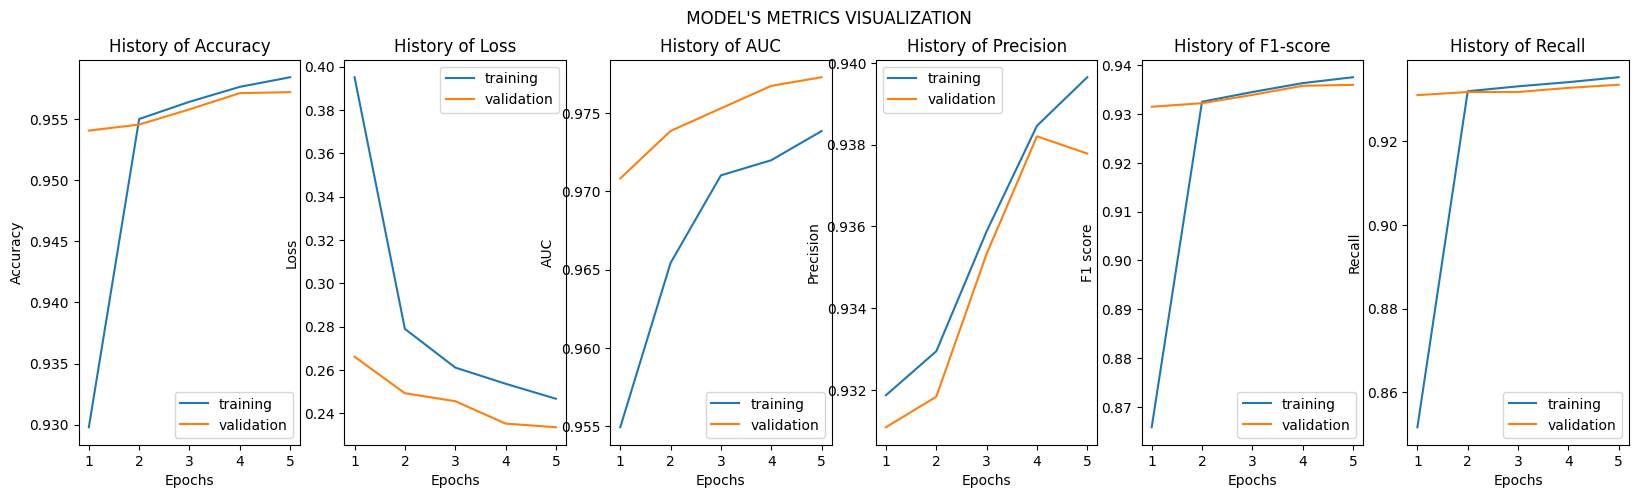

126/126 [==============================] - 1s 7ms/step - loss: 0.2335 - accuracy: 0.9572 - precision: 0.9378 - recall: 0.9336 - auc: 0.9773 - f1_score: 0.9357
LSTM Accuracy is: 95.72139382362366 %
126/126 [==============================] - 1s 5ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1860
           1       0.91      0.98      0.94      1937
           2       0.76      0.06      0.11       223

    accuracy                           0.94      4020
   macro avg       0.88      0.68      0.68      4020
weighted avg       0.93      0.94      0.92      4020



In [ ]:
model = Sequential()
model.add(LSTM(56, input_shape=(135,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(16))
model.add(Dropout(0.3))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=5, batch_size=100, verbose=1)

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score'],
               history.history['recall'],history.history['val_recall']
              )

lstm = model.evaluate(X_test, Y_test,verbose=1)[1]*100
print('LSTM Accuracy is:',model.evaluate(X_test, Y_test,verbose=1)[1]*100,'%')

lstm_pred=model.predict(X_test)

predictions = argmax(lstm_pred, axis=1)

print('Classification Report')
cr=classification_report(y_test, predictions)
print(cr)


Gated Recurrent Neural Network
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 135, 150)          68850     
                                                                 
 dropout_2 (Dropout)         (None, 135, 150)          0         
                                                                 
 gru_1 (GRU)                 (None, 50)                30300     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 99,303
Trainable params: 99,303
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
161/161 [

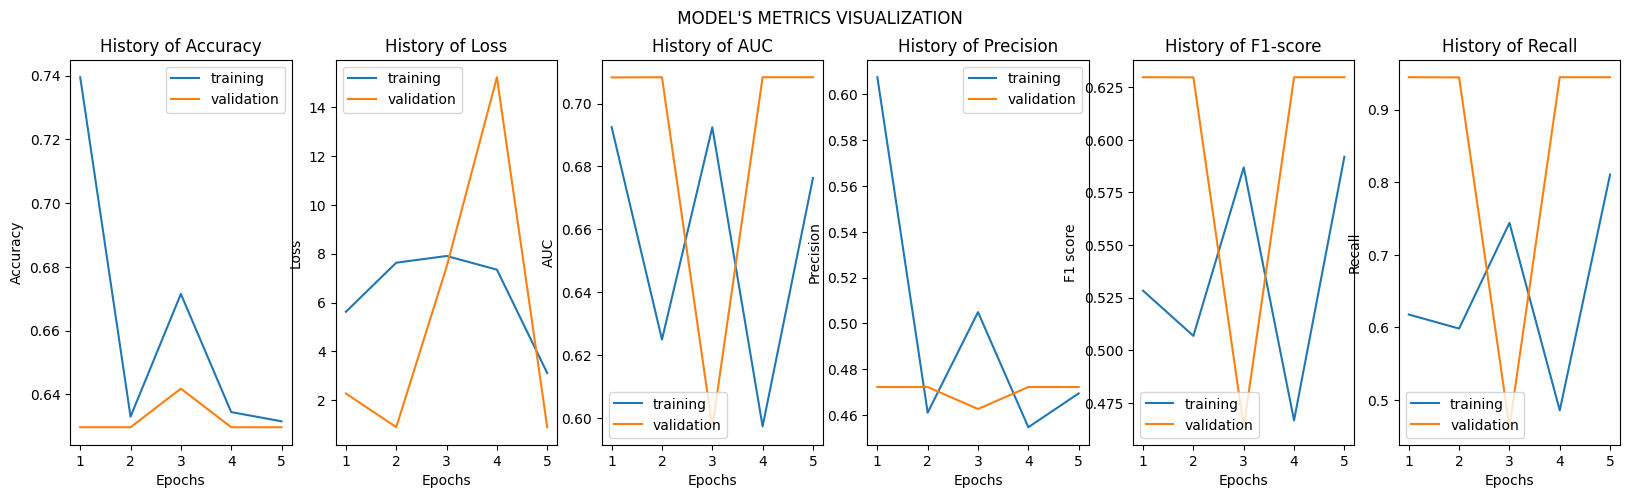

126/126 [==============================] - 7s 55ms/step - loss: 0.8941 - accuracy: 0.6297 - precision: 0.4723 - recall: 0.9445 - auc: 0.7084 - f1_score: 0.6297
GRU Accuracy is: 62.96849250793457 %
126/126 [==============================] - 8s 62ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      1860
           1       0.00      0.00      0.00      1937
           2       0.00      0.00      0.00       223

    accuracy                           0.46      4020
   macro avg       0.15      0.33      0.21      4020
weighted avg       0.21      0.46      0.29      4020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

'''Gated Recurrent Neural Network'''

print('Gated Recurrent Neural Network')
model1 = Sequential()
model1.add(GRU(units=150, return_sequences=True, input_shape=(135,1), activation='relu'))
model1.add(Dropout(0.2))
model1.add(GRU(units=50, input_shape=(9,1), activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=3))
#Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)
model1.summary()
history = model1.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                 epochs=5, batch_size=100, verbose=1)

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score'],
               history.history['recall'],history.history['val_recall']
              )

gru = model1.evaluate(X_test, Y_test,verbose=1)[1]*100
print('GRU Accuracy is:',model1.evaluate(X_test, Y_test,verbose=1)[1]*100,'%')

gru_pred=model1.predict(X_test)

predictions = argmax(gru_pred, axis=1)

print('Classification Report')
cr=classification_report(y_test, predictions)
print(cr)


--------------------CONVOLUTIONAL NEURAL NETWORK----------------------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 131, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 65, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 61, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 64)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 128)           41088     
                                                 

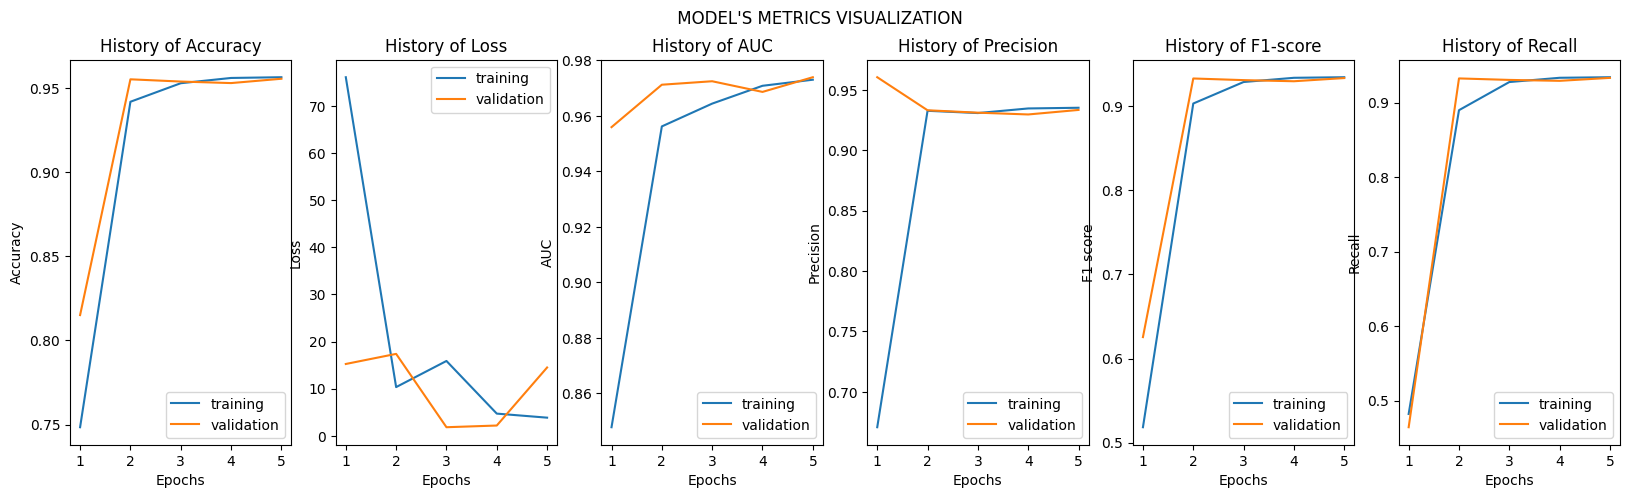

126/126 [==============================] - 1s 4ms/step - loss: 14.5011 - accuracy: 0.9555 - precision: 0.9333 - recall: 0.9331 - auc: 0.9739 - f1_score: 0.9333
CNN Accuracy is: 95.54726481437683 %
126/126 [==============================] - 0s 2ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1860
           1       0.91      0.98      0.94      1937
           2       0.00      0.00      0.00       223

    accuracy                           0.93      4020
   macro avg       0.62      0.66      0.64      4020
weighted avg       0.88      0.93      0.91      4020



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

print("--------------------CONVOLUTIONAL NEURAL NETWORK----------------------")
model2 = Sequential()
model2.add(Conv1D(32, kernel_size=5, activation='relu', input_shape=(135, 1)))
model2.add(MaxPooling1D())

model2.add(Conv1D(64, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D())

model2.add(Conv1D(128, kernel_size=5, activation='relu'))
model2.add(MaxPooling1D())

model2.add(Flatten())

model2.add(Dense(20, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

history = model2.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=5, batch_size=100, verbose=1)

CNN = model2.evaluate(X_test,Y_test, verbose = 1)[1]*100
print("CONVOLUTIONAL NEURAL NETWORK ACCURACY IS:",CNN,'%')

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score'],
               history.history['recall'],history.history['val_recall']
              )

cnn = model2.evaluate(X_test, Y_test,verbose=1)[1]*100

print('CNN Accuracy is:',model2.evaluate(X_test, Y_test,verbose=1)[1]*100,'%')

cnn_pred=model2.predict(X_test)

predictions = argmax(cnn_pred, axis=1)

print('Classification Report')
cr=classification_report(y_test, predictions)
print(cr)

-----------------------PERFORMANCE ESTIMATION-------------------------


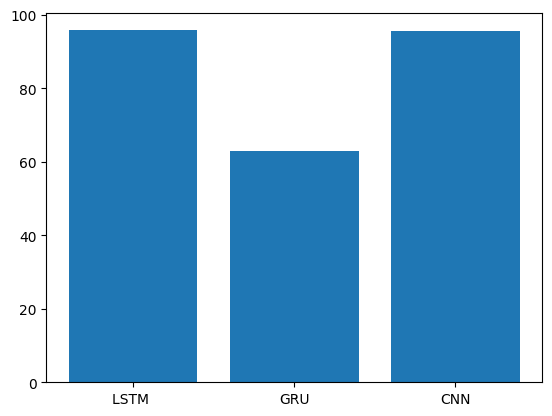

In [ ]:

#===================================COMPARISION================================
print("-----------------------PERFORMANCE ESTIMATION-------------------------")
vals=[lstm, gru, cnn]
inds=range(len(vals))
labels=["LSTM ","GRU","CNN"]

fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()

In [ ]:
lstm_acc = model.evaluate(X_test, Y_test,verbose=1)[1]
lstm_pre = model.evaluate(X_test, Y_test,verbose=1)[2]
lstm_recall = model.evaluate(X_test, Y_test,verbose=1)[3]
lstm_auc = model.evaluate(X_test, Y_test,verbose=1)[4]
lstm_f1 = model.evaluate(X_test, Y_test,verbose=1)[5]

126/126 [==============================] - 1s 7ms/step - loss: 0.2335 - accuracy: 0.9572 - precision: 0.9378 - recall: 0.9336 - auc: 0.9773 - f1_score: 0.9357


In [ ]:
gru_acc = model1.evaluate(X_test, Y_test,verbose=1)[1]
gru_pre = model1.evaluate(X_test, Y_test,verbose=1)[2]
gru_recall = model1.evaluate(X_test, Y_test,verbose=1)[3]
gru_auc = model1.evaluate(X_test, Y_test,verbose=1)[4]
gru_f1 = model1.evaluate(X_test, Y_test,verbose=1)[5]

126/126 [==============================] - 6s 49ms/step - loss: 0.8941 - accuracy: 0.6297 - precision: 0.4723 - recall: 0.9445 - auc: 0.7084 - f1_score: 0.6297


In [ ]:
cnn_acc = model2.evaluate(X_test, Y_test,verbose=1)[1]
cnn_pre = model2.evaluate(X_test, Y_test,verbose=1)[2]
cnn_recall = model2.evaluate(X_test, Y_test,verbose=1)[3]
cnn_auc = model2.evaluate(X_test, Y_test,verbose=1)[4]
cnn_f1 = model2.evaluate(X_test, Y_test,verbose=1)[5]

126/126 [==============================] - 1s 4ms/step - loss: 14.5011 - accuracy: 0.9555 - precision: 0.9333 - recall: 0.9331 - auc: 0.9739 - f1_score: 0.9333


In [ ]:
import pandas as pd

# intialise data of lists.
data = {'Name':['LSTM', 'GRU', 'CNN'],
        'Accuracy':[lstm_acc, gru_acc, cnn_acc],
        'Precision':[lstm_pre, gru_pre, cnn_pre],
        'Recall':[lstm_recall, gru_recall, cnn_recall],
        'AUC':[lstm_auc, gru_auc, cnn_auc],
        'F1-SCORE':[lstm_f1, gru_f1, cnn_f1],
        }

# Create DataFrame
df = pd.DataFrame(data)
df

In [ ]:
df.plot(kind='bar')